# <center>Plotly_Mall_Customers<center>

<center><blockquote><b>Visualization gives you answers to questions you didn’t know you had.</b><i> - Ben Shneiderman</i></blockquote><center>

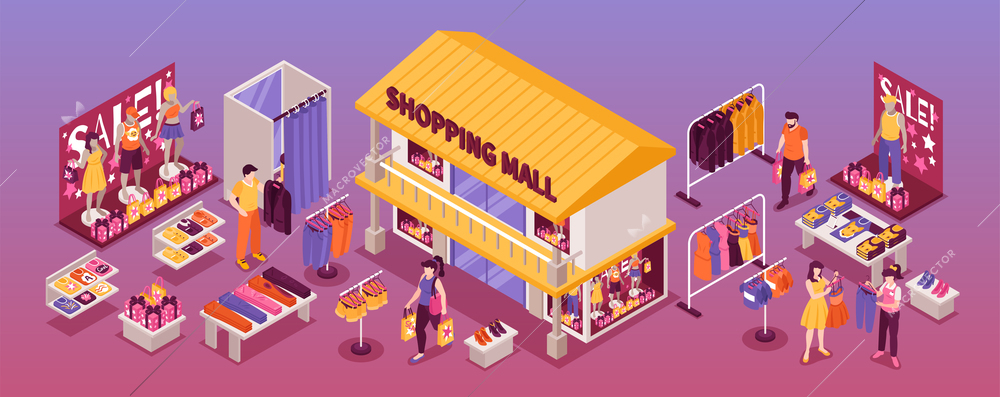

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [ ]:
fig = go.Figure(data = [go.Table(
    header = dict(values = list(data.columns),
                fill_color = 'rgb(251,166,121)',
                align ='left'),
    cells=dict(values = [data['CustomerID'], data['Gender'], data['Age'], 
                       data['Annual Income (k$)'], data['Spending Score (1-100)']],
               fill_color = 'rgb(253,237,176)',
               align = 'left'))
])

fig.show()

<b><font color='purple'>Description :</font></b>
* **CustomerID** : Each Customer has its own ID. (Numerical)
* **Gender** : Male or Female. (Categorical)
* **Age** : (Numerical)
* **Annual Income** : Income of customers in K
* **Spending Score (1-100)** : A score assigned to the customer based on some defined parameters, such as purchasing data.

In [ ]:
print('Number of columns: {:}\nNumber of rows: {:}'.format(data.shape[1], data.shape[0]))

In [ ]:
data.describe()

* **Age** : Age ranges from 18 to 70. 
* **Annual Income** : The  Income of the customers ranges from 15k Dollars per Year to 137k Dollars per Year.
* **Spending Score** : Minimum Spending Score equals to 1, and Maximum Spending Score equals to 99.

<b><font color='purple'>Missing values :</font></b>

In [ ]:
data.isnull().sum()

**None.**

## Interactive Histograms :

In [ ]:
fig = px.histogram(data, x = "Age", color = 'Gender', title = 'Age Distribution')
fig.show()

In [ ]:
fig = px.histogram(data, x ="Annual Income (k$)", color = 'Gender', title = 'Annual Income (k$) Distribution')
fig.show()

In [ ]:
fig = px.histogram(data, x = "Spending Score (1-100)", color = 'Gender', title = 'Spending Score Distribution')
fig.show()

## Interactive Boxplots :

In [ ]:
fig = px.box(data, y="Age", title = 'Age Boxplot')
fig.show()

In [ ]:
fig = px.box(data, y="Annual Income (k$)", title = 'Annual Income (k$) Boxplot')
fig.show()

**We can easily spot an extreme value : 137k. 
Let's take a look at the characteristics of the customer(s) that owns/own this amount of annual income.**

In [ ]:
data.loc[data['Annual Income (k$)'] == 137]

In [ ]:
fig = px.box(data, y="Spending Score (1-100)", title = 'Spending Score (1-100) Boxplot')
fig.show()

## Interactive Pie Chart  :

In [ ]:
df = pd.DataFrame(data['Gender'].value_counts()).reset_index()
df.columns = ['Gender', 'Total']
df

In [ ]:
fig = px.pie(df, values = 'Total', names = 'Gender', title = 'Gender Pie Chart')
fig.show()

**56% of the customers are Female (112) and 44% are Male (88).**

## Interactive Barplots :

In [ ]:
fig = px.bar(data, x = "Gender", y = "Age", color = "Gender", title = "Age By Gender")
fig.show()

In [ ]:
fig = px.bar(data, x = "Gender", y = "Annual Income (k$)", color = "Gender", title = "Annual Income (k$) By Gender")
fig.show()

In [ ]:
fig = px.bar(data, x = "Gender", y = "Spending Score (1-100)", color = "Gender", title = "Spending Score (1-100) By Gender")
fig.show()

In [ ]:
fig = px.bar(data, x = "Age", y = "Annual Income (k$)", color = "Gender", title = "Annual Income By Age + Gender Info")
fig.show()

In [ ]:
fig = px.bar(data, x = "Age", y = "Spending Score (1-100)", color = "Gender", title = "Spending Score by Age + Gender Info")
fig.show()

## Interactive Scatter Plot :

In [ ]:
fig = px.scatter(data, x = "Annual Income (k$)", y = "Spending Score (1-100)", color = "Gender",
                 size = 'Age')
fig.show()

**Can't say much about the correlation between the Spending Score and the Annual Income.**

## Interactive Heatmap :

In [ ]:
X = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_2 = data.copy()
df_2 = df_2.drop(['CustomerID'], axis = 1)

In [ ]:
fig = go.Figure(data = go.Heatmap(
        z = df_2.corr(),
        x = X,
        y = X,
        colorscale='RdBu'))
fig.show()

**We used Heatmap to see if we can find a correlation between Spending Score and Age, and between Annual Income and Age. Unfortunately, we got a low correlation value. Let's move now to the Clustering Algorithms!**

## KMeans :

In [ ]:
from sklearn.cluster import KMeans

**We will use WCSS (Within-Cluster-Sum-of-Squares), which is basically  the sum of squares of the distances of each data point in all clusters to their respective centroids. - Also known as The Elbow Method.**

In [ ]:
x = df_2.iloc[:,2:4].values
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 500, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(data = go.Scatter(x = [1,2,3,4,5,6,7,8,9,10], y = wcss))


fig.update_layout(title = 'WCSS By Cluster Number',
                   xaxis_title = 'Clusters',
                   yaxis_title = 'WCSS')
fig.show()

**Optimal Number of Clusters according to the Elbow Method : 5 clusters.**

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(x)

**Let's use Silhouette Score this time to find the optimal number of clusters, and see if it's equal to 5.**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silscore = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silscore.append(silhouette_avg)
    
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

**Highest Silhouette Score = Best Cluster. Bingo! It's 5.**

In [ ]:
data_clusters = data.copy()
data_clusters['Cluster'] = y

**We Created a dataframe that will contain a column of the number of clusters assigned to each CustomerID.**

In [ ]:
data_clusters.head()

In [ ]:
fig = px.scatter(data_clusters, x = "Annual Income (k$)", y = "Spending Score (1-100)", 
                 color = "Cluster",
                 size = 'Age',
                 title = "Clusters Visualization")
fig.show()

**Conclusion :**
* Low Annual Income (x <= 39) and Low Spending Score (x <= 40). - **Cluster 3 (Orange).**
* Low Annual Income (x <= 39) and High Spending Score (x >= 61). - **Cluster 1 (Purple).**
* Mid Annual Income (39 <= x <= 76) and Mid Spending Score (34 <= x <= 61). - **Cluster 0 (Blue).**
* High Annual Income (x >= 70) and Low Spending Score (x <= 39). - **Cluster 4 (Yellow).**
* High Annual Income (x >= 69) and High Spending Score (x >= 63). - **Cluster 2 (Pink).**

**Statistics about the Clusters :**

In [ ]:
data_c0 = data_clusters[data_clusters['Cluster'] == 0]
data_c0.describe()

In [ ]:
data_c1 = data_clusters[data_clusters['Cluster'] == 1]
data_c1.describe()

In [ ]:
data_c2 = data_clusters[data_clusters['Cluster'] == 2]
data_c2.describe()

In [ ]:
data_c3 = data_clusters[data_clusters['Cluster'] == 3]
data_c3.describe()

In [ ]:
data_c4 = data_clusters[data_clusters['Cluster'] == 4]
data_c4.describe()

## Affinity Propagation :

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
AP = AffinityPropagation(random_state = 0)
y = AP.fit_predict(x)

In [ ]:
data_clusters = data.copy()
data_clusters['Cluster'] = y

In [ ]:
fig = px.scatter(data_clusters, x = "Annual Income (k$)", y = "Spending Score (1-100)", 
                 color = "Cluster",
                 size = 'Age',
                 title = "Clusters Visualization")
fig.show()

**The number of clusters is equal to 10. Doesn't look like a good result.**

`[Other Clustering Algorithms coming soon, stay tuned hehe! :)]`